In [4]:
from models_train.IQAmodel import IQAModel
import os
import numpy as np
import random
import torch
from argparse import ArgumentParser
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms.functional import resize, to_tensor, normalize
import torch.nn.functional as F
from PIL import Image
import h5py
from tqdm import tqdm

from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
%set_env CUDA_VISIBLE_DEVICES=0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = IQAModel( 
                arch="resnet101", 
                pool='avg', 
                use_bn_end=False, 
                P6=1, 
                P7=1,
                cayley_pool=False
                ).to(device)  #

server_mnt = "~/mnt/dione/28i_mel/Linearity-ckpt"
destination_path = os.path.expanduser(server_mnt)
path = os.path.join(destination_path, "activation=relu-Linearity-resnet101-bs=8-loss=norm-in-norm-p=1.0-q=2.0-detach-False-KonIQ-10k-res=True-498x664")
checkpoint = torch.load(path)
model.load_state_dict(checkpoint['model'])
k = checkpoint['k']
b = checkpoint['b']
_ = model.eval()

env: CUDA_VISIBLE_DEVICES=0


/mnt/ssd2/28i_mel/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/mnt/ssd2/28i_mel/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_1768099/3497549688.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#

In [8]:
def _get_norms(model):
    norms = []
    for key, layer in model.named_children():
        if isinstance(layer, torch.nn.Conv2d):
            norms.append(torch.norm(layer.weight).item())
            print(layer.weight.shape)
        else:
            norms += _get_norms(layer)
    return norms

In [9]:
iter_dir = list(Path('NIPS_test').iterdir())
norms = []
# for name in tqdm(iter_dir, total=len(iter_dir)):
#     # print(name)
#     im = Image.open(name).convert('RGB')  #
#     im = resize(im, (498, 664)) #
#     im = to_tensor(im).to(device)
#     im = im.unsqueeze(0)
# for i, layer in enumerate(model.features):
#     if isinstance(layer, torch.nn.Conv2d):
#         norms.append(torch.norm(layer.weight))
norms0 = _get_norms(model)


torch.Size([64, 3, 7, 7])
torch.Size([64, 64, 1, 1])
torch.Size([64, 64, 3, 3])
torch.Size([256, 64, 1, 1])
torch.Size([256, 64, 1, 1])
torch.Size([64, 256, 1, 1])
torch.Size([64, 64, 3, 3])
torch.Size([256, 64, 1, 1])
torch.Size([64, 256, 1, 1])
torch.Size([64, 64, 3, 3])
torch.Size([256, 64, 1, 1])
torch.Size([128, 256, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([512, 256, 1, 1])
torch.Size([128, 512, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([128, 512, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([128, 512, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([256, 512, 1, 1])
torch.Size([256, 256, 3, 3])
torch.Size([1024, 256, 1, 1])
torch.Size([1024, 512, 1, 1])
torch.Size([256, 1024, 1, 1])
torch.Size([256, 256, 3, 3])
torch.Size([1024, 256, 1, 1])
torch.Size([256, 1024, 1, 1])
torch.Size([256, 256, 3, 3])
torch.Size([1024, 256, 1, 1])
torch.Size([256, 1024, 1,

<BarContainer object of 104 artists>

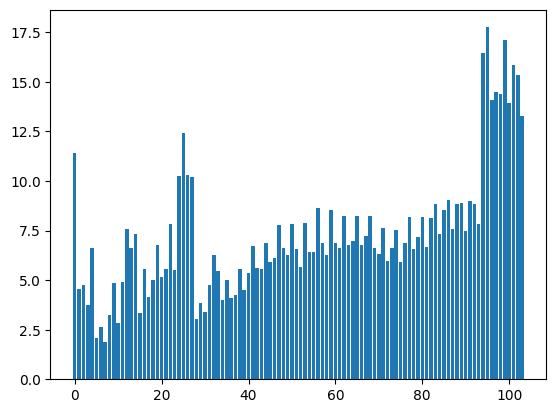

In [10]:
plt.bar(x=[i for i in range(len(norms0))], height=norms0)

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = IQAModel( 
                arch="resnet101", 
                pool='avg', 
                use_bn_end=False, 
                P6=1, 
                P7=1,
                cayley_pool=True
                ).to(device)  #

server_mnt = "~/mnt/dione/28i_mel/Linearity-ckpt"
destination_path = os.path.expanduser(server_mnt)
path = os.path.join(destination_path, "activation=relu-Linearity-resnet101-bs=8-loss=norm-in-norm-p=1.0-q=2.0-detach-False-KonIQ-10k-res=True-498x664-clp=True")
checkpoint = torch.load(path)
model.load_state_dict(checkpoint['model'])
k = checkpoint['k']
b = checkpoint['b']
_ = model.eval()

/mnt/ssd2/28i_mel/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/mnt/ssd2/28i_mel/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_1768099/1983089758.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#

In [12]:
norms1 = _get_norms(model)

torch.Size([64, 3, 7, 7])
torch.Size([64, 64, 1, 1])
torch.Size([64, 64, 3, 3])
torch.Size([256, 64, 1, 1])
torch.Size([256, 64, 1, 1])
torch.Size([64, 256, 1, 1])
torch.Size([64, 64, 3, 3])
torch.Size([256, 64, 1, 1])
torch.Size([64, 256, 1, 1])
torch.Size([64, 64, 3, 3])
torch.Size([256, 64, 1, 1])
torch.Size([128, 256, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([512, 256, 1, 1])
torch.Size([128, 512, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([128, 512, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([128, 512, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([256, 512, 1, 1])
torch.Size([256, 256, 3, 3])
torch.Size([1024, 256, 1, 1])
torch.Size([1024, 512, 1, 1])
torch.Size([256, 1024, 1, 1])
torch.Size([256, 256, 3, 3])
torch.Size([1024, 256, 1, 1])
torch.Size([256, 1024, 1, 1])
torch.Size([256, 256, 3, 3])
torch.Size([1024, 256, 1, 1])
torch.Size([256, 1024, 1,

<BarContainer object of 106 artists>

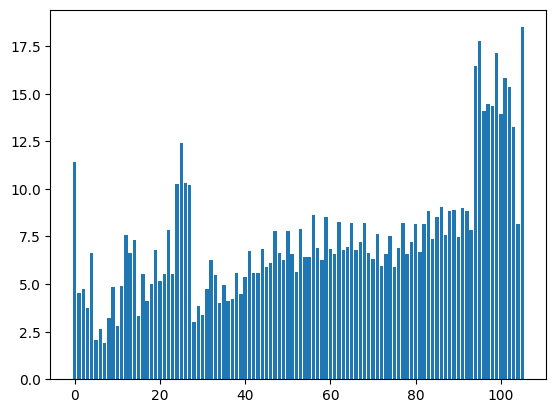

In [13]:
plt.bar(x=[i for i in range(len(norms1))], height=norms1)

<BarContainer object of 106 artists>

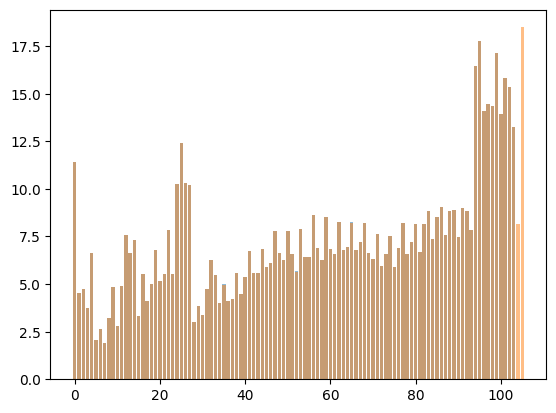

: 

In [14]:
plt.bar(x=[i for i in range(len(norms0))], height=norms0, alpha=0.5)
plt.bar(x=[i for i in range(len(norms1))], height=norms1, alpha=0.5)